In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '4xXBLWKnnVM6Vre4a3pMMLPNP' 
        consumer_secret = 'UkDDRLhJ2VckqKYElqwGTT4WbupPkscOSUr7mzJY1V2YDEYIY0' 
        access_token = '237211273-lwJmXbFbuBSQHHCLVhnVMZRI9vH441Z8weCpntCa' 
        access_token_secret = 'KTwmCO9BO5zpV6kIvNMtocArxTNMuUj8l8hSBzpXa3ezF'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_taglist(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        tags_list = analysis.tags  # penn treebank style tags
        return tags_list
        
        
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                parsed_tweet['user'] = tweet.user.name
                
                parsed_tweet['created_at'] = tweet.created_at
                
                parsed_tweet['Source'] = tweet.source
                
                parsed_tweet['favorited'] = tweet.favorited
                
                parsed_tweet['taglist'] = self.get_taglist(tweet.text)
                
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 

# creating object of TwitterClient Class for Kohli
api = TwitterClient()
# calling function to get tweets
tweetskohli = api.get_tweets(query = 'Kohli', count = 1000)
tweetsViratKohli = api.get_tweets(query = 'Virat Kohli', count = 1000)
tweetsVirat = api.get_tweets(query = 'Virat', count = 1000)
tweetsVK = tweetskohli + tweetsVirat + tweetsViratKohli
print (len(tweetsVK))
import pandas as pd
ViratKohli = pd.DataFrame(tweetsVK)
print(ViratKohli.head(5))
print(len(ViratKohli[ViratKohli['sentiment'] == 'positive'])/len(ViratKohli))
#ViratKohli.to_csv('VK.csv', index=False, header=False)

# creating object of TwitterClient Class for RCB

tweetsRCB = api.get_tweets(query = 'RCB', count = 1000)
tweetsFullFormRCB = api.get_tweets(query = 'Royal Challangers Bangalore', count = 1000)
tweetsRCBFull = tweetsRCB + tweetsFullFormRCB
print (len(tweetsRCBFull))
import pandas as pd
RCB = pd.DataFrame(tweetsRCBFull)
print(RCB.head(5))
print(len(RCB[RCB['sentiment'] == 'positive'])/len(RCB))
#RCB.to_csv('RCB.csv', index=False, header=False)

# creating object of TwitterClient Class for ABD

tweetsABD = api.get_tweets(query = 'ABD', count = 1000)
tweetsFullFormABD = api.get_tweets(query = 'AB De Villiers', count = 1000)
tweetsDe = api.get_tweets(query = 'De Villiers', count = 1000)
tweetsABDFull = tweetsABD + tweetsFullFormABD + tweetsDe
print (len(tweetsABDFull))
import pandas as pd
ABD = pd.DataFrame(tweetsABDFull)
print(ABD.head(5))
print(len(ABD[ViratKohli['sentiment'] == 'positive'])/len(ABD))
#ABD.to_csv('ABD.csv', index=False, header=False)

300
                Source          created_at  favorited sentiment  \
0  Twitter for Android 2018-06-23 11:05:49      False   neutral   
1  Twitter for Android 2018-06-23 11:05:05      False  positive   
2  Twitter for Android 2018-06-23 11:04:56      False   neutral   
3  Twitter for Android 2018-06-23 11:04:53      False   neutral   
4               twidge 2018-06-23 11:04:31      False   neutral   

                                             taglist  \
0  [(RT, NNP), (Messi, NNP), (Argentina, NNP), (A...   
1  [(19, CD), (U, NNP), (r, NN), (killing, VBG), ...   
2  [(RT, NNP), (ArrhanSingh, NNP), (Why, WRB), (a...   
3  [(RT, NNP), (InternationalYogaDay, NNP), (Bhak...   
4                                                 []   

                                                text  \
0  RT @MOCK3RY: Messi- Argentina\n\nAB De Villier...   
1  @rashidkhan_19 @ESPNcricinfo ,,U r killing it ...   
2  RT @firstpost: #ArrhanSingh, Why are you throw...   
3  RT @BMadho1: #InternationalYo

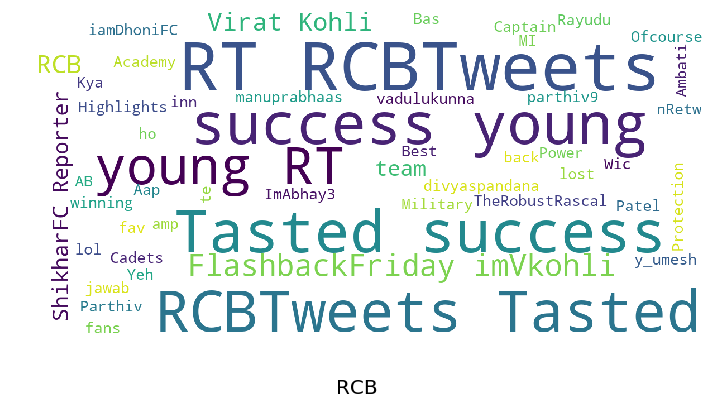

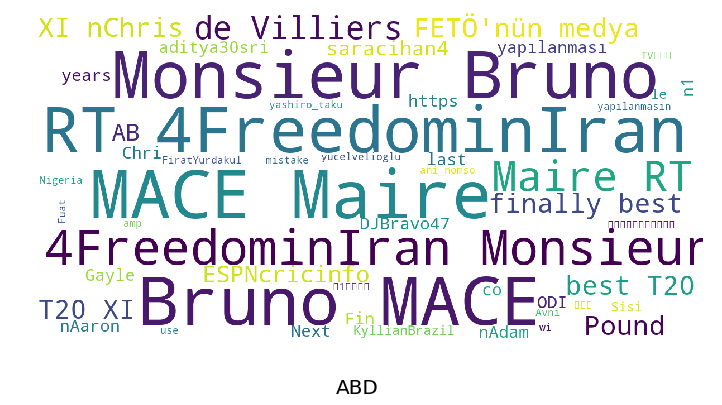

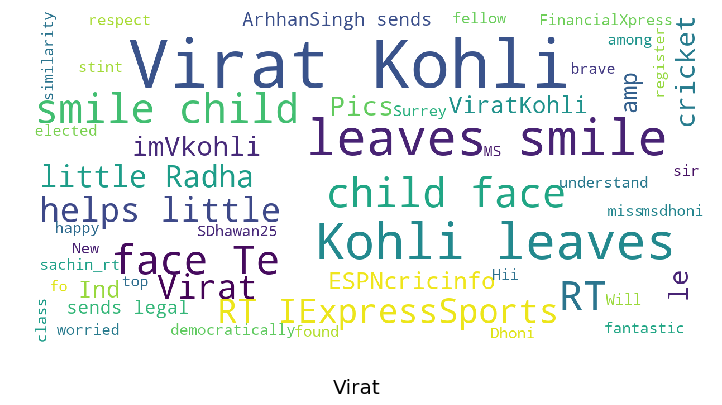

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
data1 = RCB[RCB['sentiment'] == 'positive'].text
data2 = ABD[ABD['sentiment'] == 'positive'].text
data3 = ViratKohli[ViratKohli['sentiment'] == 'positive'].text
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data1, title ='RCB') 
show_wordcloud(data2, title ='ABD')
show_wordcloud(data3, title ='Virat') 


In [4]:
ABD[ABD['user'].isin(ViratKohli['user'])]

,Source,created_at,favorited,sentiment,taglist,text,user
100,Twitter for Android,2018-06-23 11:05:49,False,neutral,"[(RT, NNP), (Messi, NNP), (Argentina, NNP), (A...",RT @MOCK3RY: Messi- Argentina\n\nAB De Villier...,#BJP - bhago janta pitegi
101,Twitter for Android,2018-06-23 10:53:33,False,neutral,"[(RT, NNP), (Messi, NNP), (Argentina, NNP), (A...",RT @MOCK3RY: Messi- Argentina\n\nAB De Villier...,¯\_(ツ)_/¯
102,Twitter for Android,2018-06-23 10:29:34,False,neutral,"[(RT, NNP), (AB, NNP), (de, IN), (Villiers, NN...","RT @RCBTweets: AB de Villiers, Baz, Virat - 3 ...",Amaalified Armaanian🤓❤
200,Twitter for Android,2018-06-23 11:05:49,False,neutral,"[(RT, NNP), (Messi, NNP), (Argentina, NNP), (A...",RT @MOCK3RY: Messi- Argentina\n\nAB De Villier...,#BJP - bhago janta pitegi
207,Twitter for Android,2018-06-23 10:53:33,False,neutral,"[(RT, NNP), (Messi, NNP), (Argentina, NNP), (A...",RT @MOCK3RY: Messi- Argentina\n\nAB De Villier...,¯\_(ツ)_/¯
213,Twitter for Android,2018-06-23 10:29:34,False,neutral,"[(RT, NNP), (AB, NNP), (de, IN), (Villiers, NN...","RT @RCBTweets: AB de Villiers, Baz, Virat - 3 ...",Amaalified Armaanian🤓❤


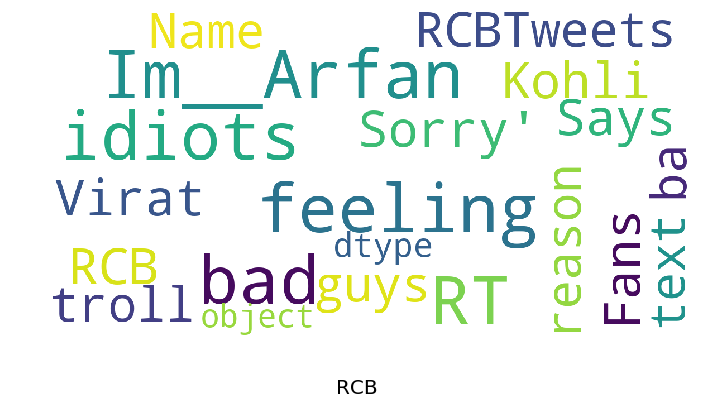

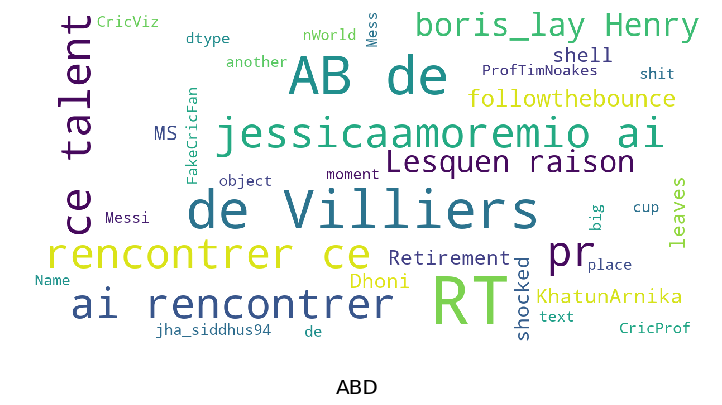

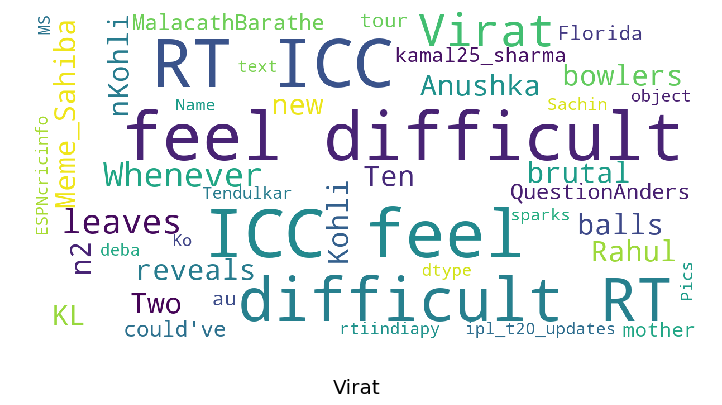

In [5]:
data4 = RCB[RCB['sentiment'] == 'negative'].text
data5 = ABD[ABD['sentiment'] == 'negative'].text
data6 = ViratKohli[ViratKohli['sentiment'] == 'negative'].text
show_wordcloud(data4, title ='RCB') 
show_wordcloud(data5, title ='ABD')
show_wordcloud(data6, title ='Virat') 


In [6]:
search_terms = 'RCB ', 'Football'
tweetsRelation = api.get_tweets(query = search_terms, count = 1000)
print (len(tweetsRelation))
import pandas as pd
RCBFootball = pd.DataFrame(tweetsRelation)
print(RCBFootball.head(5))
#RCBFootball.to_csv('RCBFootball.csv', index=False, header=True)

50
                Source          created_at  favorited sentiment  \
0  Twitter for Android 2018-06-23 06:04:06      False   neutral   
1  Twitter for Android 2018-06-23 05:04:58      False   neutral   
2  Twitter for Android 2018-06-22 16:11:09      False   neutral   
3   Twitter for iPhone 2018-06-22 15:57:43      False  positive   
4  Twitter for Android 2018-06-22 04:56:27      False   neutral   

                                             taglist  \
0                       [(manjappada, NN), (W, NNP)]   
1  [(ABD, NNP), (supporter, NN), (Protea, NNP), (...   
2  [(They, PRP), (re, VBP), (not, RB), (a, DT), (...   
3  [(RT, NNP), (High, NNP), (school, NN), (footba...   
4  [(Argentina, NNP), (is, VBZ), (RCB, NNP), (of,...   

                                                text              user  
0  @TirumalaBarBlue @KBFCtweets @SarathEXP @abhia...      Mr.Atom Bomb  
1  ⭐ABD supporter..Protea supporter n RCB support...  Ravi Chandra☮️✌️  
2  @ImSriram_ They're not a team man. 

In [7]:
print (len(RCBFootball[RCBFootball['sentiment'] == 'positive']))
len(RCBFootball[RCBFootball['sentiment'] == 'positive'])/len(RCBFootball)

23


0.46

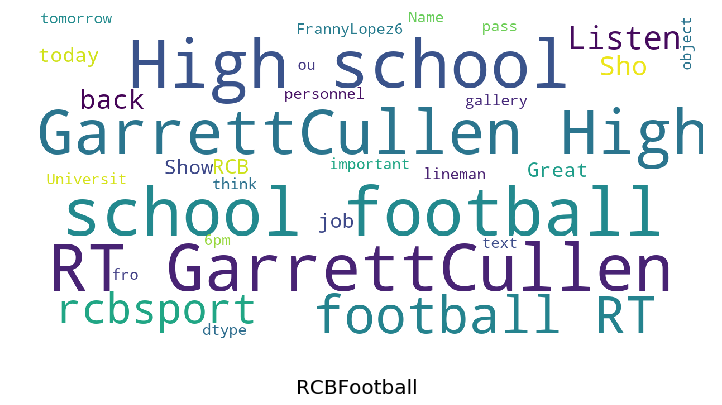

In [8]:
data7 = RCBFootball[RCBFootball['sentiment'] == 'positive'].text
show_wordcloud(data7, title ='RCBFootball') 

In [10]:
FinalDF = pd.DataFrame()
for tag in RCB['taglist']:
    labels = ['token', 'POSTag']
    tagDF = pd.DataFrame.from_records(tag, columns = labels)
    newtagDF = tagDF[tagDF['POSTag'] == 'NNP' ]
    FinalDF = pd.concat([FinalDF, newtagDF],axis=0)
FinalDF.head(20)
    

,token,POSTag
0,RT,NNP
1,Messi,NNP
2,Argentina,NNP
3,AB,NNP
4,De,NNP
5,Villiers,NNP
6,South,NNP
7,Africa,NNP
8,Kohli,NNP
9,RCB,NNP


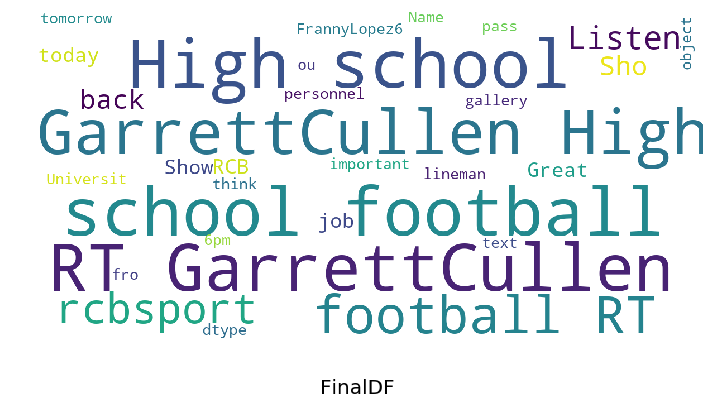

In [11]:
data8 = FinalDF.token
show_wordcloud(data7, title ='FinalDF') 